In [27]:
import pickle as pkl
import numpy as np

In [128]:
animal = 'ST264'
dayN = 4
day_name = 'Day{}'.format(dayN)
exp_pref = '{}_{}_2'.format(animal,day_name)
out_dir = '../models/'+exp_pref
with open(out_dir+'/summary.pkl','rb') as f:
    data = pkl.load(f)

In [129]:
def get_copulas(data):
    copulas = {}
    for d in data.reshape(-1):
        if d is not None:
            try:
                copulas[d[1]] += 1
            except KeyError:
                copulas[d[1]] = 1
    return copulas

copulas = get_copulas(data)
beh = 5
copulas_behbeh = get_copulas(data[:beh,:beh])
copulas_behneu = get_copulas(data[:beh,beh:])
copulas_neuneu = get_copulas(data[beh:,beh:])

In [130]:
# how many dependancies (per cent)?
def get_percent(copulas):
    M = np.sum([v for v in copulas.values()])
    return (1-copulas['Independence']/M)*100

print('{}: {} neurons, {:.3}% overall, {:.3}% behbeh, {:.3}% behneu, {:.3}% neuneu'.format(
    exp_pref, data.shape[0]-beh, 
    get_percent(copulas), get_percent(copulas_behbeh),
    get_percent(copulas_behneu), get_percent(copulas_neuneu)))

ST264_Day4_2: 34 neurons, 20.4% overall, 70.0% behbeh, 24.7% behneu, 18.2% neuneu


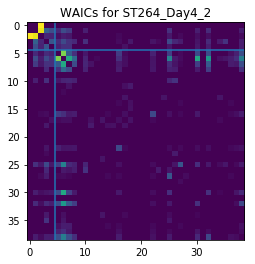

In [131]:
M = data.shape[0]
waic_img = np.zeros((M,M))
for i in range(M-1):
    for j in range(i+1,M):
        waic_img[i,j] = data[i,j][2]
        waic_img[j,i] = data[i,j][2]
plt.imshow(waic_img)
plt.axhline(beh-0.5)
plt.axvline(beh-0.5)
plt.title('WAICs for '+exp_pref);

In [88]:
[copulas['Independence'],copulas['Gaussian'],copulas['Frank']]

[308, 16, 15]

In [89]:
import re

copula_names = ['Independence','Gaussian','Frank','Clayton','Gumbel']
new_dict = {}

for key, value in copulas.items():
    binary_key = np.zeros(len(copula_names)).astype(int) #4 types of copulas
    for i, name in enumerate(copula_names):
        if re.search(name,key):
            binary_key[i]+=1
    new_key = ''.join([str(b) for b in binary_key])
    try:
        new_dict[new_key] += value
    except KeyError:
        new_dict[new_key] = value

In [90]:
new_dict

{'00100': 15,
 '10000': 308,
 '00110': 4,
 '01000': 16,
 '10100': 7,
 '01010': 15,
 '01001': 2,
 '01100': 6,
 '10010': 1,
 '01110': 1,
 '00101': 1,
 '10101': 1,
 '11001': 1}

In [91]:
copulas

{'Frank': 15,
 'Independence': 308,
 'Clayton0°Frank': 1,
 'Gaussian': 16,
 'IndependenceFrank': 7,
 'Clayton270°Gaussian': 2,
 'Clayton270°Frank': 1,
 'Gumbel90°Gaussian': 1,
 'Clayton0°Gaussian': 2,
 'Clayton90°Gaussian': 3,
 'Clayton180°Gaussian': 6,
 'FrankGaussian': 6,
 'GaussianClayton180°': 1,
 'FrankClayton180°': 1,
 'IndependenceClayton180°': 1,
 'FrankClayton180°Gaussian': 1,
 'FrankGumbel0°': 1,
 'GaussianGumbel0°': 1,
 'Clayton180°Frank': 1,
 'FrankIndependenceGumbel0°': 1,
 'Clayton90°Clayton270°Gaussian': 1,
 'IndependenceGumbel0°Gaussian': 1}

Text(0,0.5,'time, min')

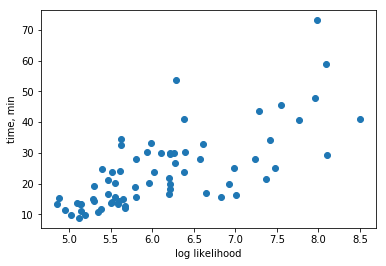

In [92]:
import matplotlib.pyplot as plt
waic, time = [], []
for d in data.reshape(-1):
    if d is not None:
        if int(d[2])!=0:
            waic.append(np.log(int(d[2])))
            time.append(int(d[3])/60)
plt.scatter(waic,time)
plt.xlabel('log likelihood')
plt.ylabel('time, min')